<p><h1><b><font color='Black'>Clustering</b></h1></p>

<p><h3><b><font color='Black'>### UseCase Summary</b></h3></p>
The **Facebook Live Sellers in Thailand** is a dataset curated in UCI Machine Learning Datasets. The data contains 7050 observations and sixteen attributes. The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion reaction. Details and academic publications relating to the data is available from the source https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand*

**Dataset Link**: https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo

**Columns description**

- **status_id** - id           
- **status_type** - upload type        
- **status_published** - published date and time    
- **num_reactions** - number of comments recieved
- **num_comments** - number of comments recieved
- **num_shares** - number of times the paticular status_type was shared       
- **num_likes** - number of likes recieved        
- **num_loves** - number of loves recieved           
- **num_wows** - number of wows recieved            
- **num_hahas** - number of hahas recieved           
- **num_sads** - number of sads recieved           
- **num_angrys** - number of angrys recieved          
- **Column1** - extra attributes           
- **Column2** - extra attributes             
- **Column3** - extra attributes             
- **Column4** - extra attributes             

**Table Contents**:-
   - Importing Data
   - Preprocessing
   - Exploratory Data Analysis(EDA)
   - Model Building
   - Conclulsion

<p><h2><b><font color="Black",style="font-family:Courier New">Importing Data<b><h2><p>

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [174]:
# from google.colab import drive
# drive.mount('/content/drive')

In [175]:
# Read the CSV file from Google Drive
file_path = '/content/drive/MyDrive/Datasets/Live.csv'

In [176]:
df = pd.read_csv(file_path,parse_dates=['status_published'])
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,2018-04-18 02:14:00,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,2018-04-18 00:24:00,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,2018-04-17 07:42:00,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,2018-04-17 03:33:00,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,2018-04-11 04:53:00,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [177]:
df.shape

(7050, 16)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  Column1           0 non-null      float64       
 13  Column2           0 non-null      float64       
 14  Column3           0 non-

<p><h2><b><font color="Black">Preprocessing<b><h2><p>

In [179]:
#checking for null values
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [180]:
#dropping these columns beacuse number of missing values are large with respect to total values
df = df.drop(["Column1","Column2","Column3","Column4"],axis=1)

In [181]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [182]:
#Checking for duplicate values and dropping them if count is more 
print("No. of Duplicates Before:",df.duplicated().sum())
df = df.drop_duplicates()
print("No. of Duplicates After:",df.duplicated().sum())

No. of Duplicates Before: 51
No. of Duplicates After: 0


In [183]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [184]:
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour
df = df.drop(['status_published'], axis=1)
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018,4,22,6
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018,4,21,22
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018,4,21,6
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018,4,21,2
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018,4,18,3


In [185]:
# since this column is of no use hence dropping
df = df.drop(['status_id'], axis=1)

<p><h2><b><font color="Black">Exploratory Data Analysis<b><h2><p>

<Axes: xlabel='status_type', ylabel='count'>

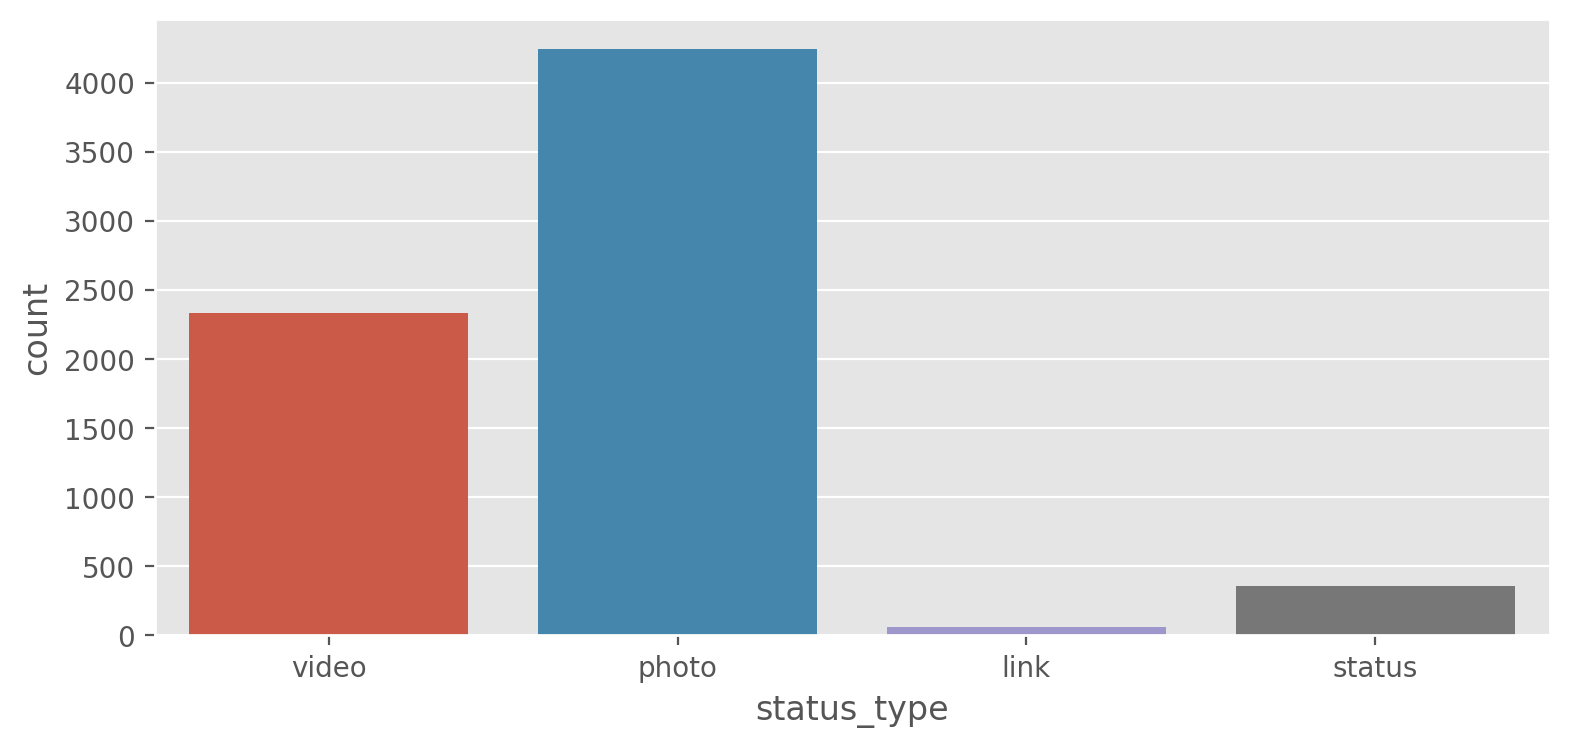

In [186]:
#Plotting countplot for categorical variable 
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = "status_type", data = df)

*   **Photo posts** is the **predominant** class followed by **video**

**===============================================================================================**

*  **Distribution of posts per Hour**

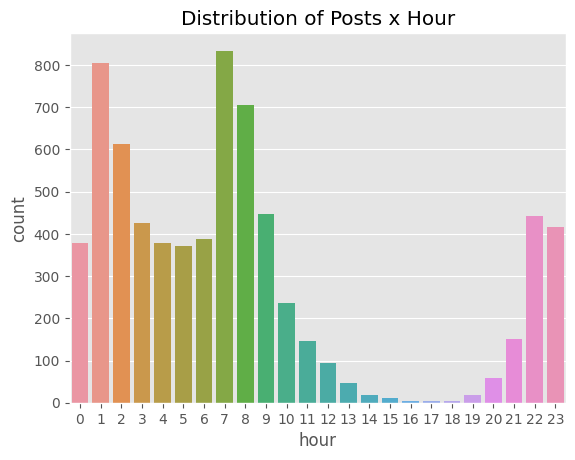

In [187]:
sns.countplot(x=df["hour"])
plt.title("Distribution of Posts x Hour")
plt.show()

*  Posts are usually not posted around 13:00 and 19:00

**==============================================================================================================**

*   **Distribution of Posts per Day of Month**

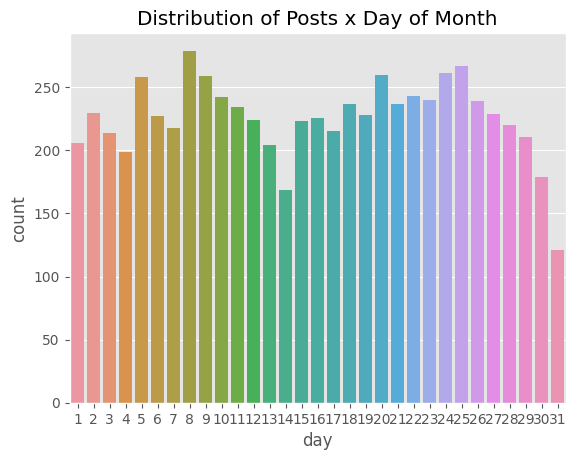

In [188]:
sns.countplot(x=df["day"])
plt.title("Distribution of Posts x Day of Month")
plt.show()

* Posts are Fairly Distributed except for 31st of Month 

**=============================================================================================**

* **Distribution of Posts Year Wise**

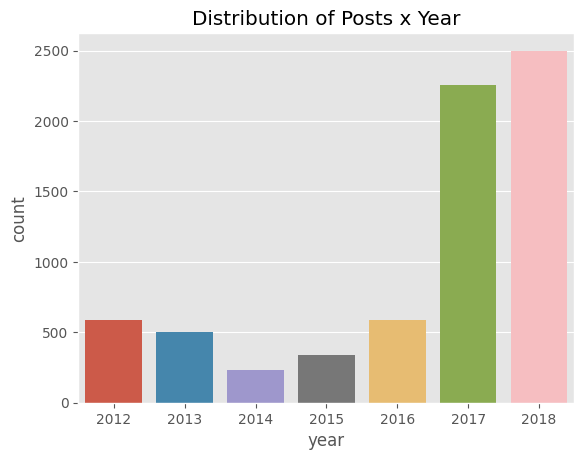

In [189]:
sns.countplot(x=df["year"])
plt.title("Distribution of Posts x Year")
plt.show()

* High Amount of posts were posted in year 2017 and 2018

**=============================================================================================================**

* **Heat Map**

<Axes: >

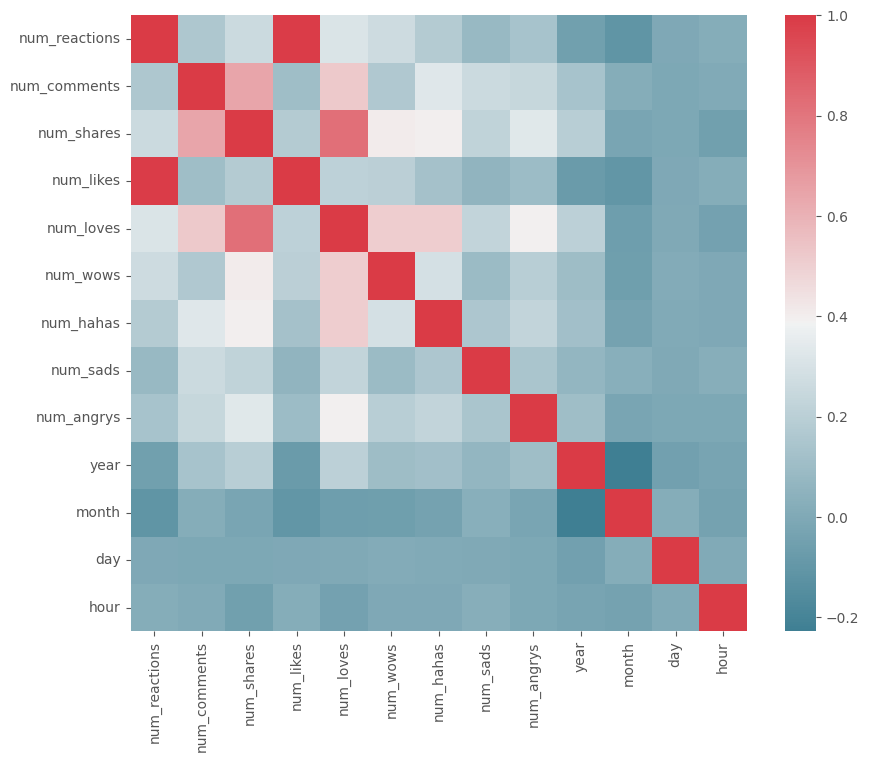

In [190]:
# heatmap to show the relational between features
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**Dropping Correlated Features**

*   num_reactions
*   num_loves
*   year
*   comments



In [191]:
df = df.drop(['num_reactions', 'num_loves', 'year', 'num_comments'], axis=1)

Heat Map after dropping correlatd features

<Axes: >

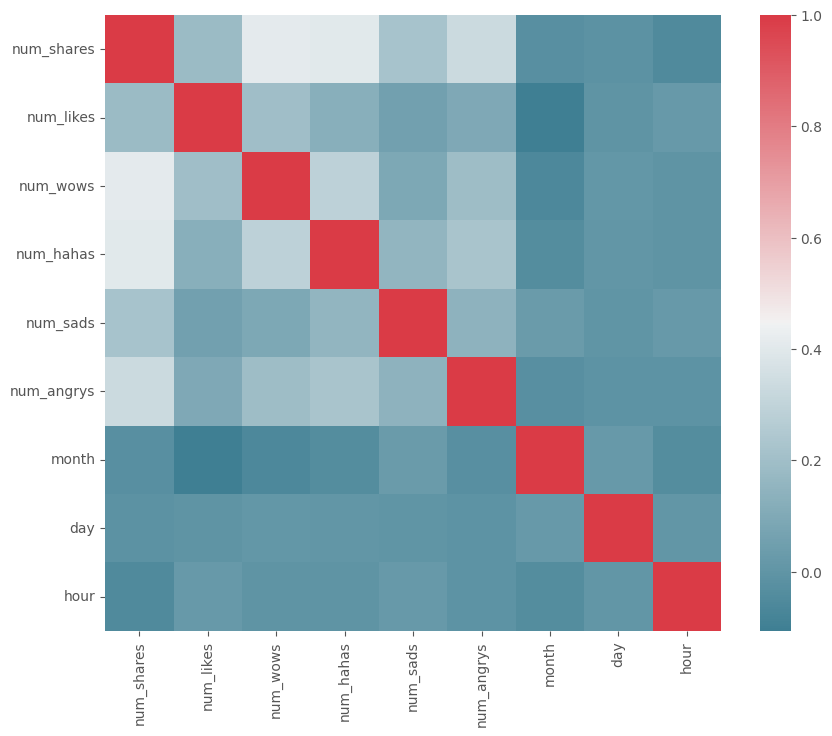

In [192]:
# heatmap to show the relational between features
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

* **Converting Categorical Variable to Numeric variable by creating Dictionary and converting it into dataframe**

In [193]:
post_type = {'video': 0,'photo': 1, 'status': 2,'link': 3}

In [194]:
df.status_type = [post_type[item] for item in df.status_type]

In [195]:
df.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,day,hour
0,0,262,432,3,1,1,0,4,22,6
1,1,0,150,0,0,0,0,4,21,22
2,0,57,204,1,1,0,0,4,21,6
3,1,0,111,0,0,0,0,4,21,2
4,1,0,204,0,0,0,0,4,18,3


**Standardizing Data**

In [196]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(6999, 10)

Elbow Method For determining number of Clusters

In [197]:
cluster_range = range(1,15)
cluster_errors = []
for n_clusters in cluster_range:
    clusters = KMeans(n_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,69990.000000
1,2,60720.874773
2,3,55154.622157
3,4,49897.001201
4,5,45581.673000
5,6,42418.534937
6,7,38827.974988
7,8,34342.126532
8,9,32977.553396
9,10,29482.746980


* The lowest cluster error is observed when there are 14 clusters, with a value of 24160.49

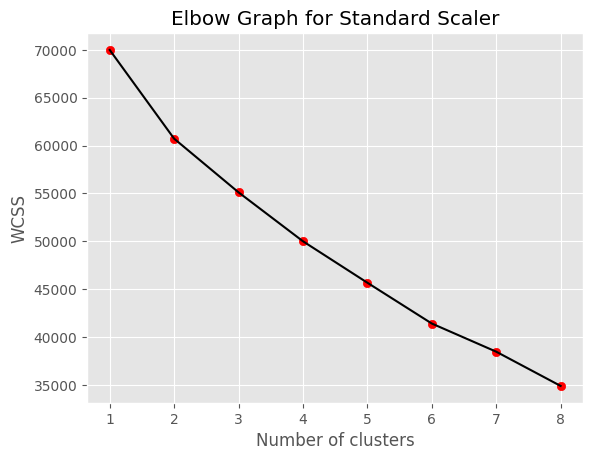

In [198]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


* k=2 can be a fair choice

Silhoutte Score

In [199]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

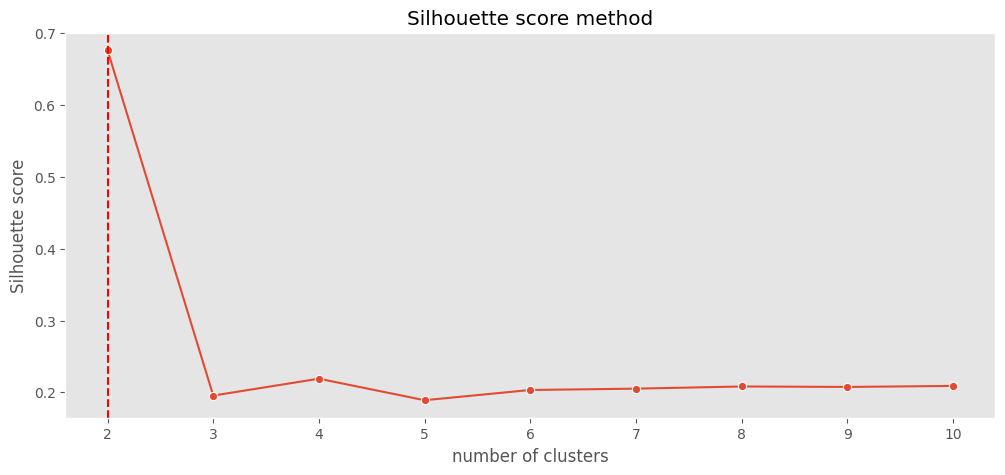

In [200]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

* Also Silhouette score method indicates the best options would be k=2 clusters.


**=========================================================================================**

<p><h2><b><font color="Black">Model Building<b><h2><p>

* Build KMeans Cluster algorithm for k=2

In [201]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(6999,)

In [202]:
model_kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [203]:
model_kmeans.cluster_centers_

array([[ 3.04609269e-02, -1.14454680e-01, -3.36838025e-02,
        -7.12344648e-02, -8.02394021e-02, -6.85986216e-02,
        -8.46066641e-02,  3.99812746e-03,  8.27684752e-04,
        -7.10243392e-04],
       [-1.04628669e+00,  3.93134485e+00,  1.15698758e+00,
         2.44679594e+00,  2.75610189e+00,  2.35625872e+00,
         2.90611072e+00, -1.37329620e-01, -2.84297172e-02,
         2.43957844e-02]])

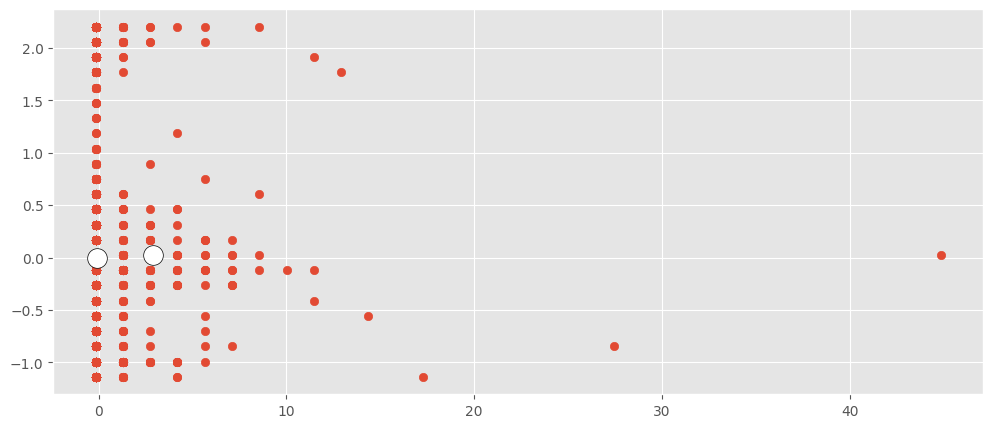

In [204]:
import matplotlib.cm as cm
fig,ax2 = plt.subplots(sharey=False)
fig.set_size_inches(12,5)

colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(std_df[:, 6], std_df[:, 9])#, marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')
#ax2.scatter(centroids[:,6], centroids[:,6], s = 70, color = '#4527db',label = 'Centroids')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

plt.show()

*   **Heirarchical Clustering - Agglomerative Clustering**

In [205]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
y_pred = agg_clustering.fit_predict(std_df)
print(y_pred.shape)
y_pred


(6999,)


array([0, 0, 0, ..., 0, 0, 0])

In [206]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [207]:
# Clustering Score
(silhouette_score(std_df, agg_clustering.labels_)*100).round(3)

92.039

**========================================================================================================**

<h2><b>Exploring Individual Cluster's Profile<b><h2>

* **Cluster's Profile Based on Shares And Likes**

In [208]:
X = df[['num_likes','num_shares']].values
X

array([[432, 262],
       [150,   0],
       [204,  57],
       ...,
       [  1,   0],
       [349,  22],
       [ 17,   0]])

* Complete linkage Dendogram

In [209]:
# Creating Dendrogram
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(X, method = 'complete')

Text(0, 0.5, 'Euclidean Distance')

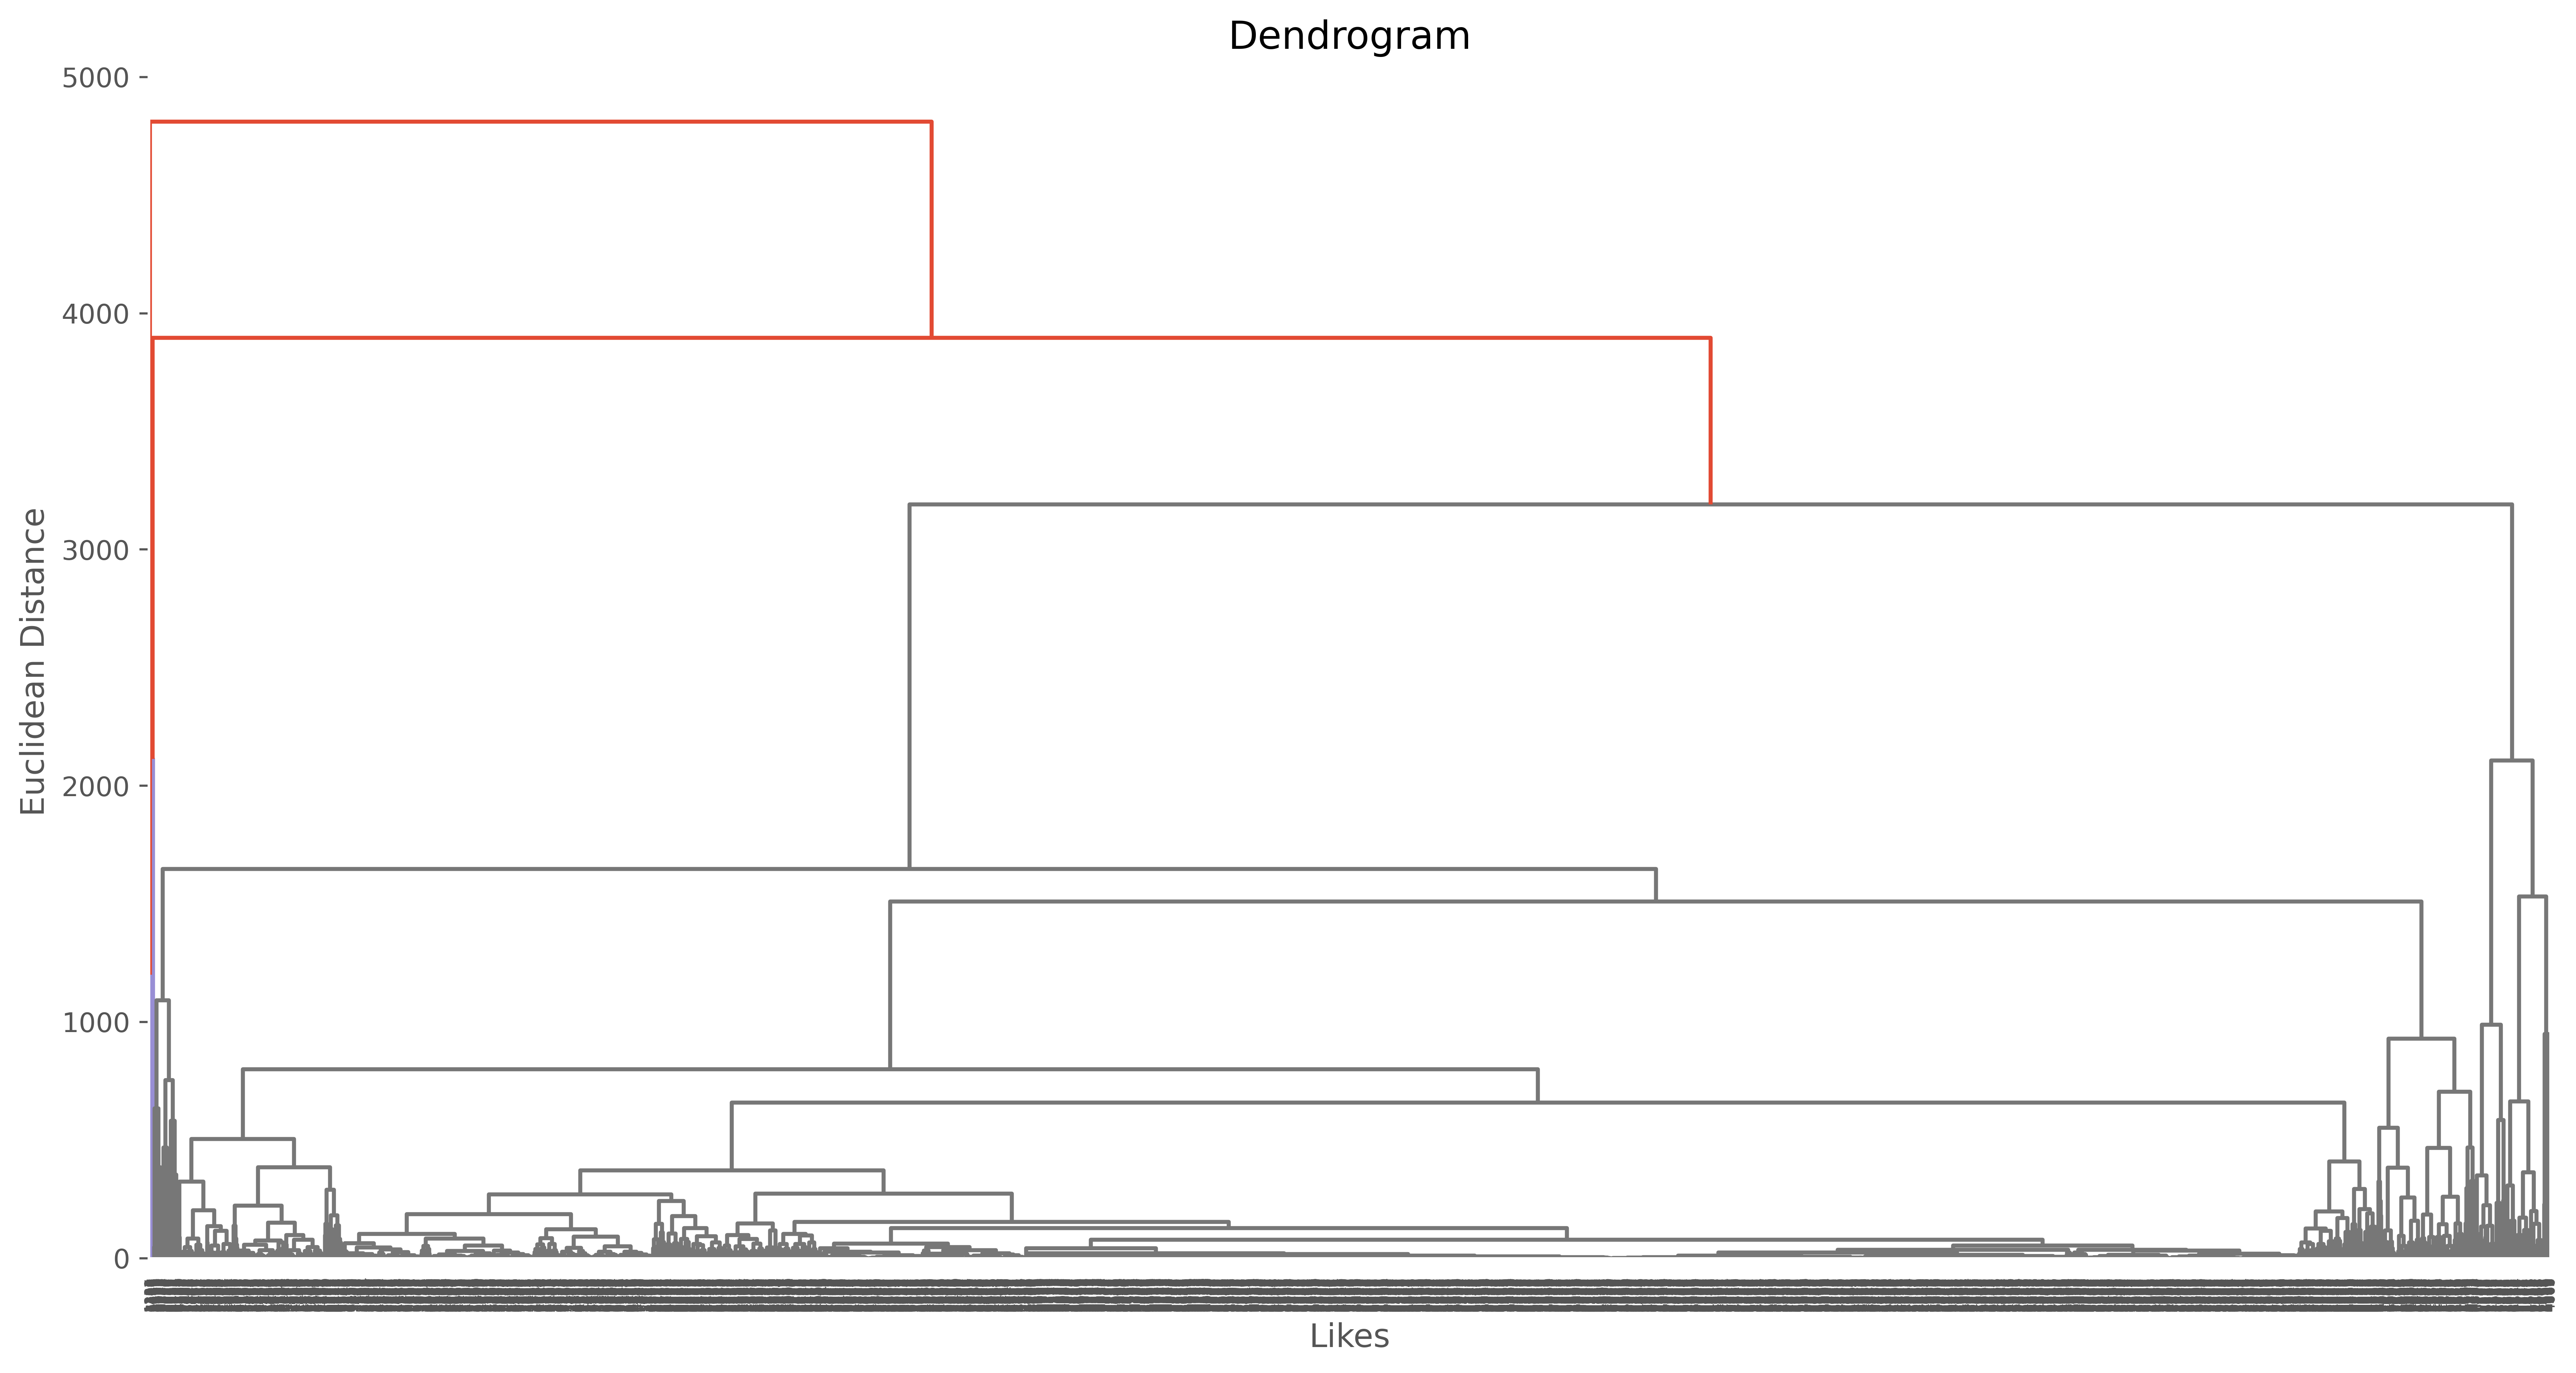

In [210]:
plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)

plt.title('Dendrogram')
plt.xlabel('Likes')
plt.ylabel('Euclidean Distance')
#plt.savefig('Dendrogram.png', dpi = 2000)

* Single Linkage Dendogram

Text(0, 0.5, 'Euclidean Distance')

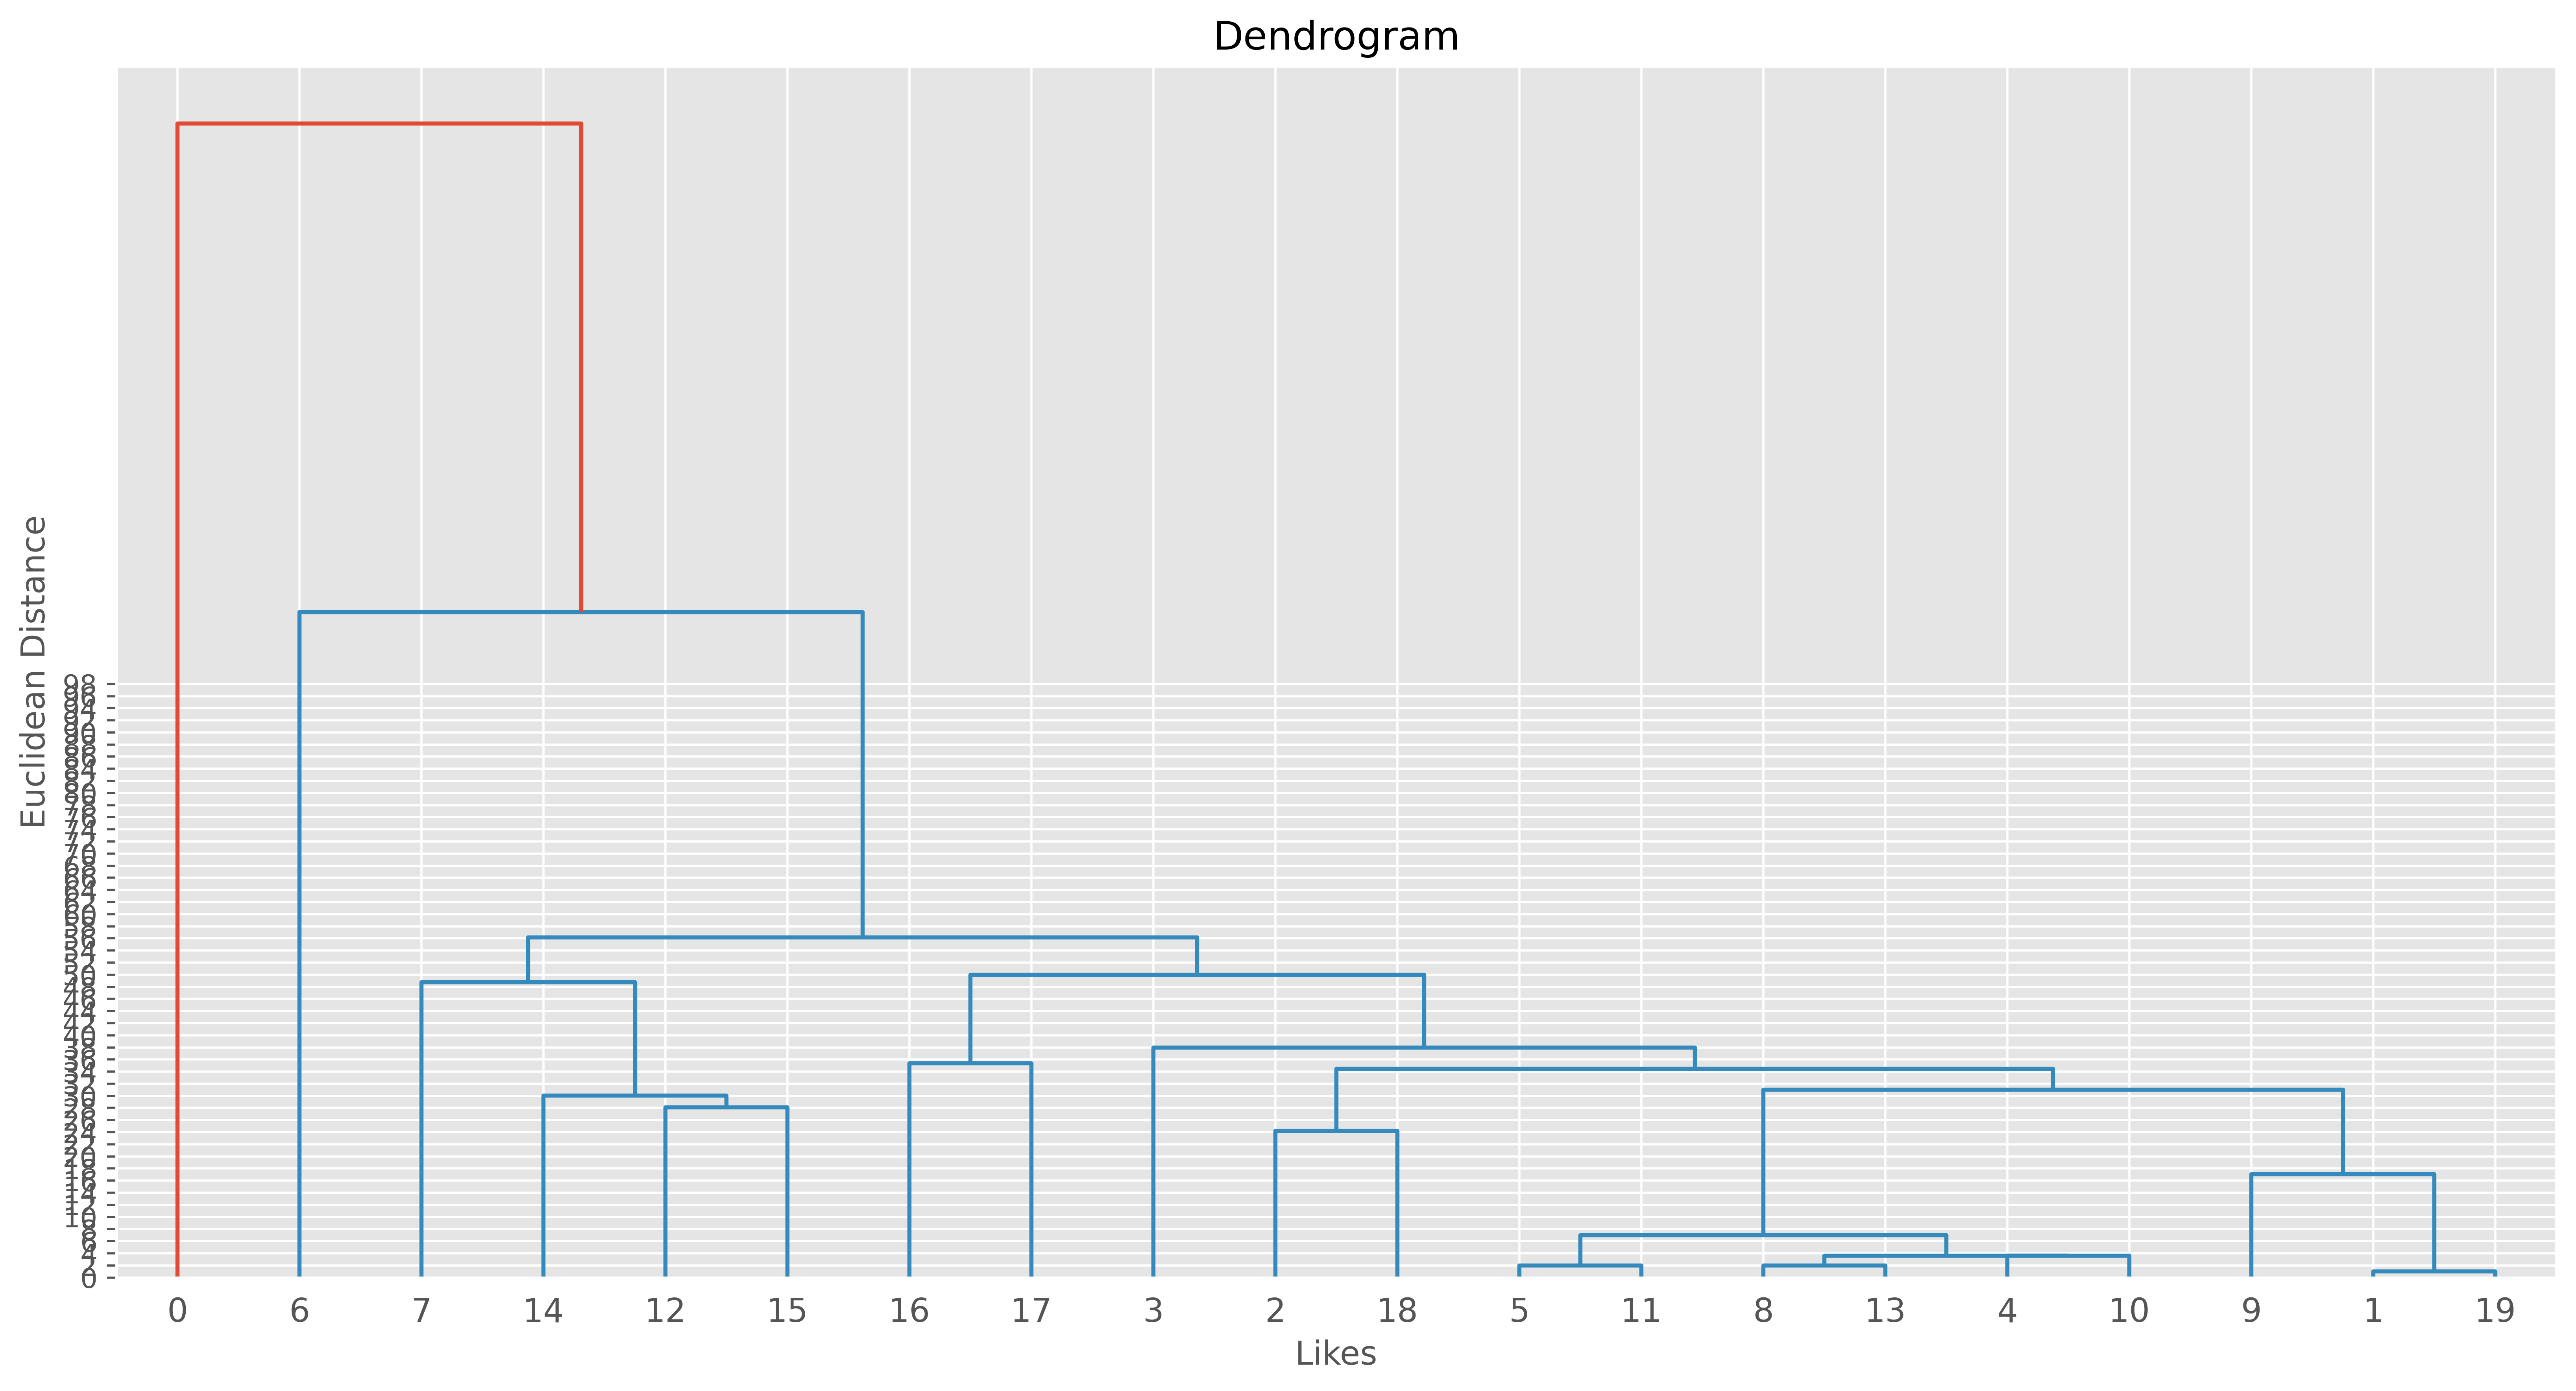

In [211]:
linkage_matrix = sch.linkage(X[:20], method = 'single')

plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)

plt.yticks(range(0,100,2))
plt.title('Dendrogram')
plt.xlabel('Likes')
plt.ylabel('Euclidean Distance')

In [212]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

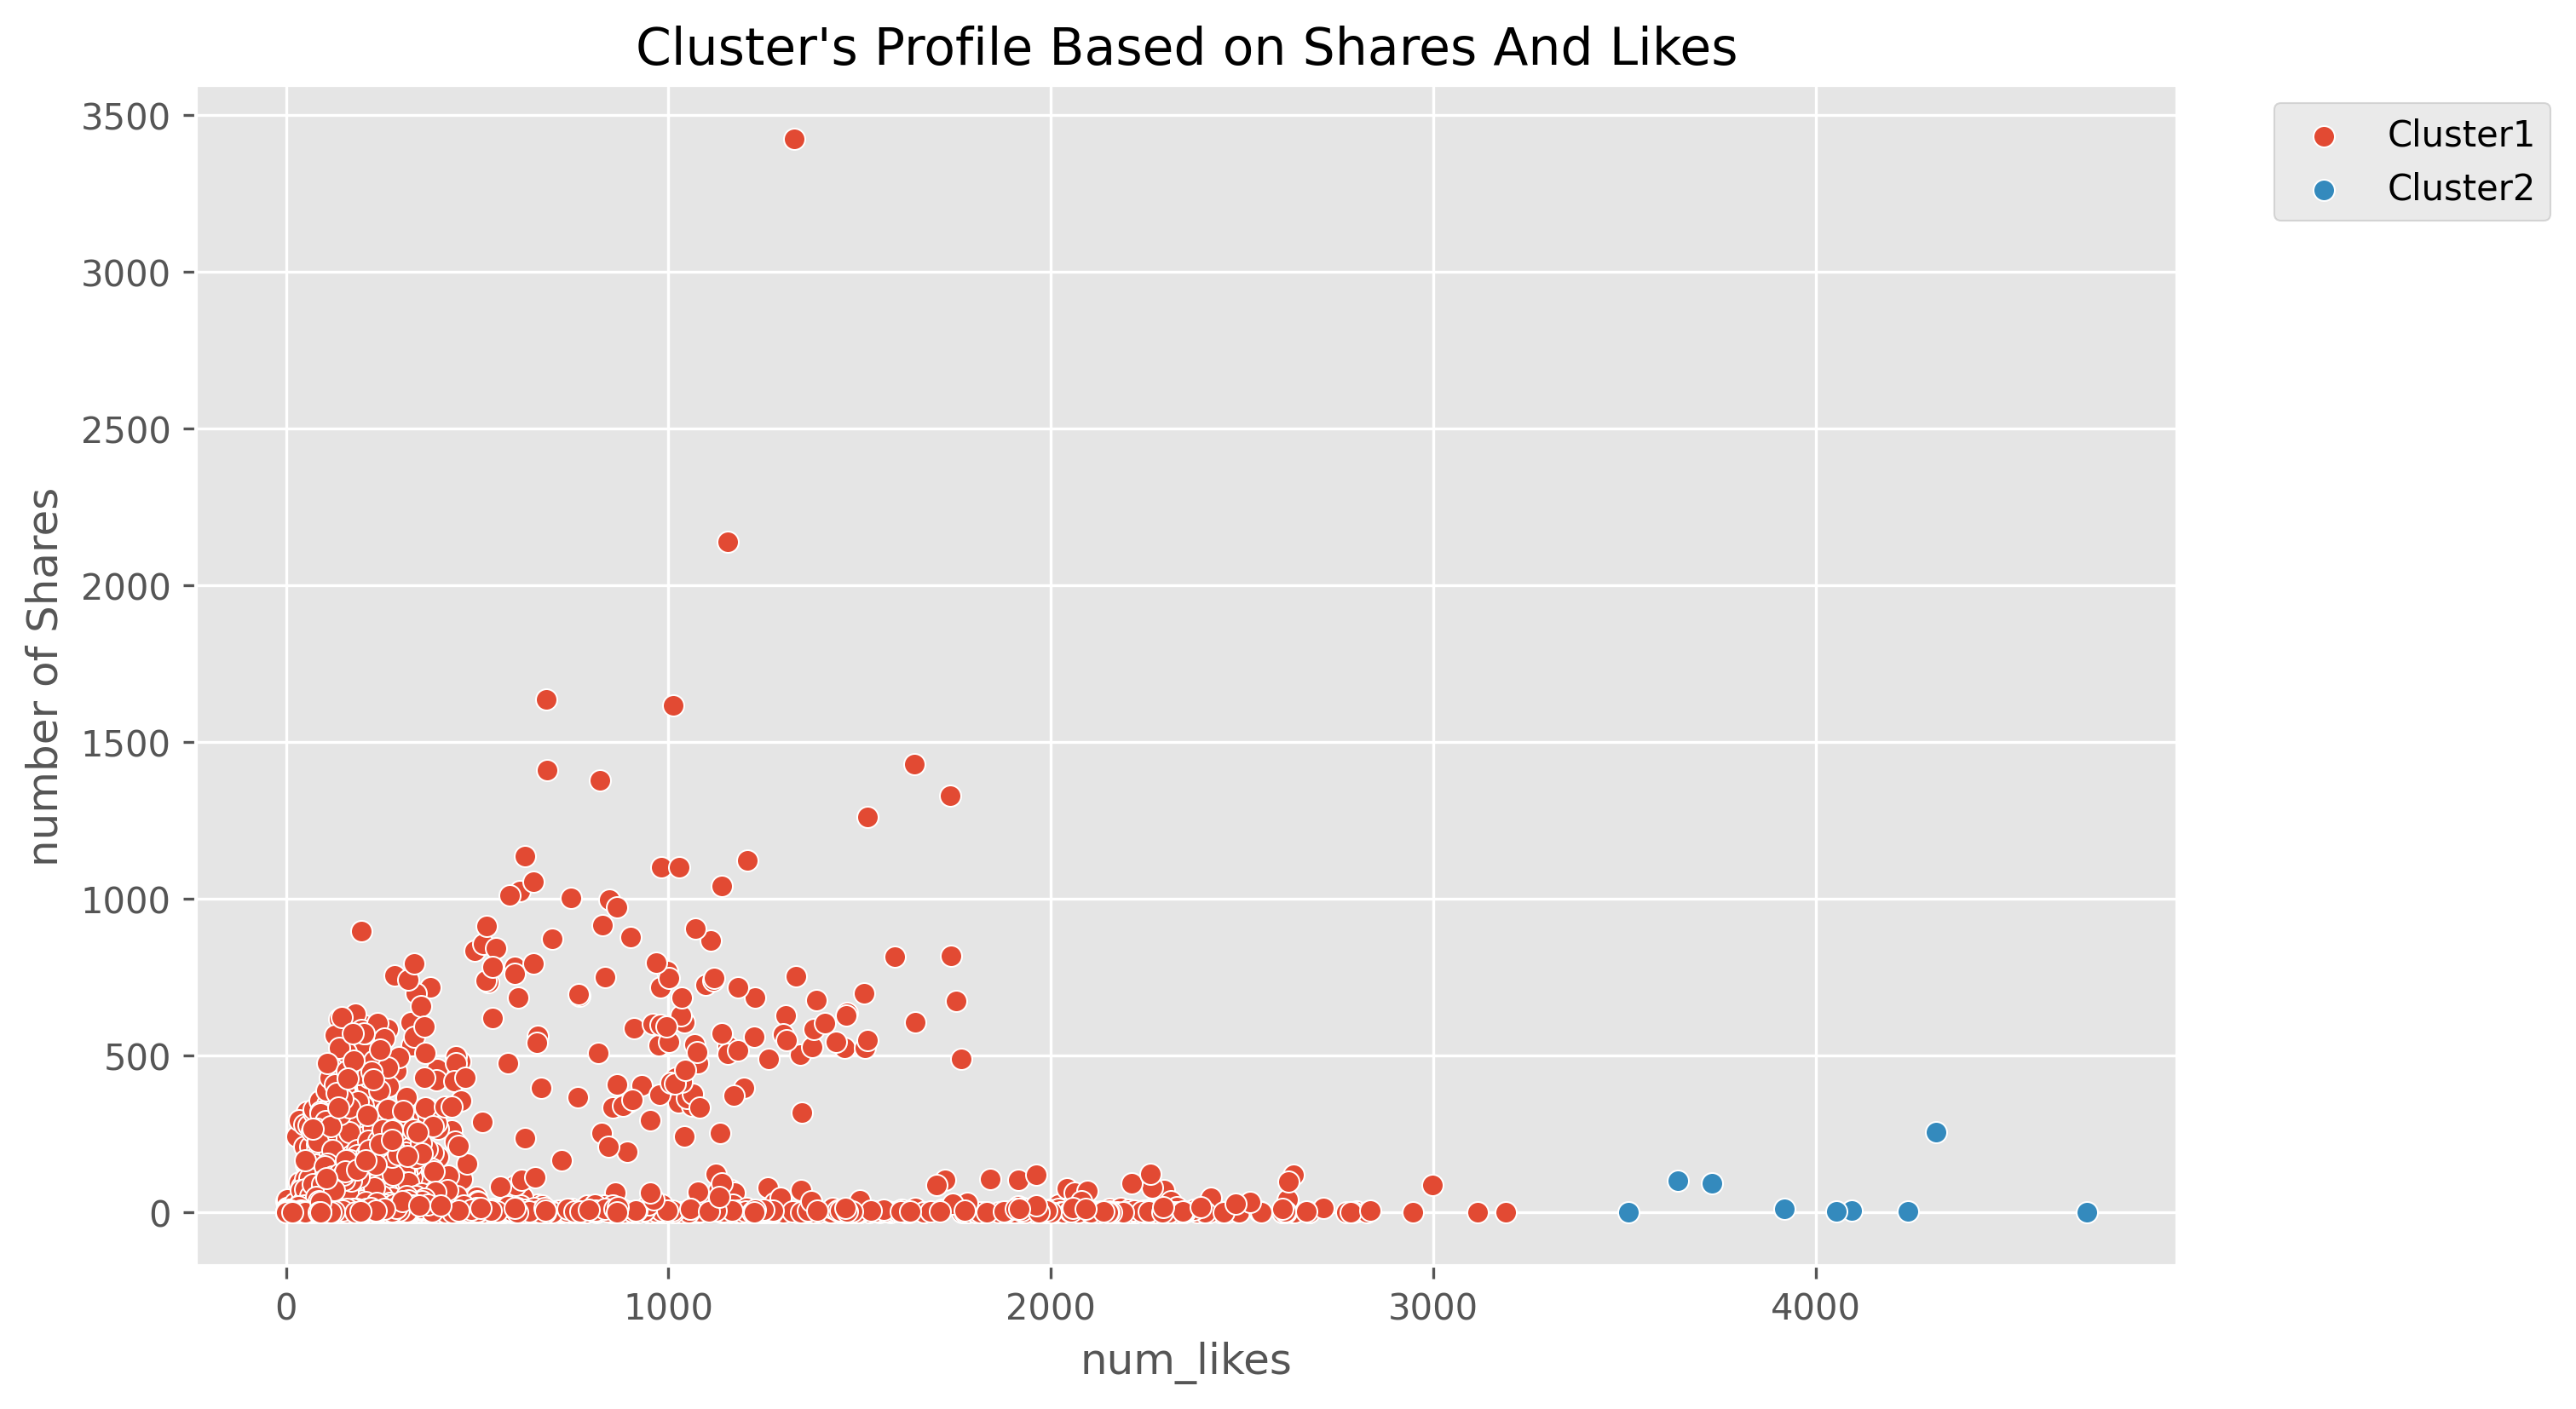

In [213]:
plt.figure(figsize = (10,6), dpi = 300)
sns.scatterplot(x = X[y_hc == 0,0], y = X[y_hc == 0,1], label = 'Cluster1')
sns.scatterplot(x = X[y_hc == 1,0], y = X[y_hc == 1,1], label = 'Cluster2')



plt.title("Cluster's Profile Based on Shares And Likes")
plt.xlabel('num_likes')
plt.ylabel('number of Shares')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

* sellers of the cluster 2 have more shares and less likes than the sellers of the cluster 1

**=========================================================================================================**

* **Cluster's Profile Based on Type Status And Likes**

In [214]:
X = df[['num_likes','status_type']].values
X

array([[432,   0],
       [150,   1],
       [204,   0],
       ...,
       [  1,   1],
       [349,   1],
       [ 17,   1]])

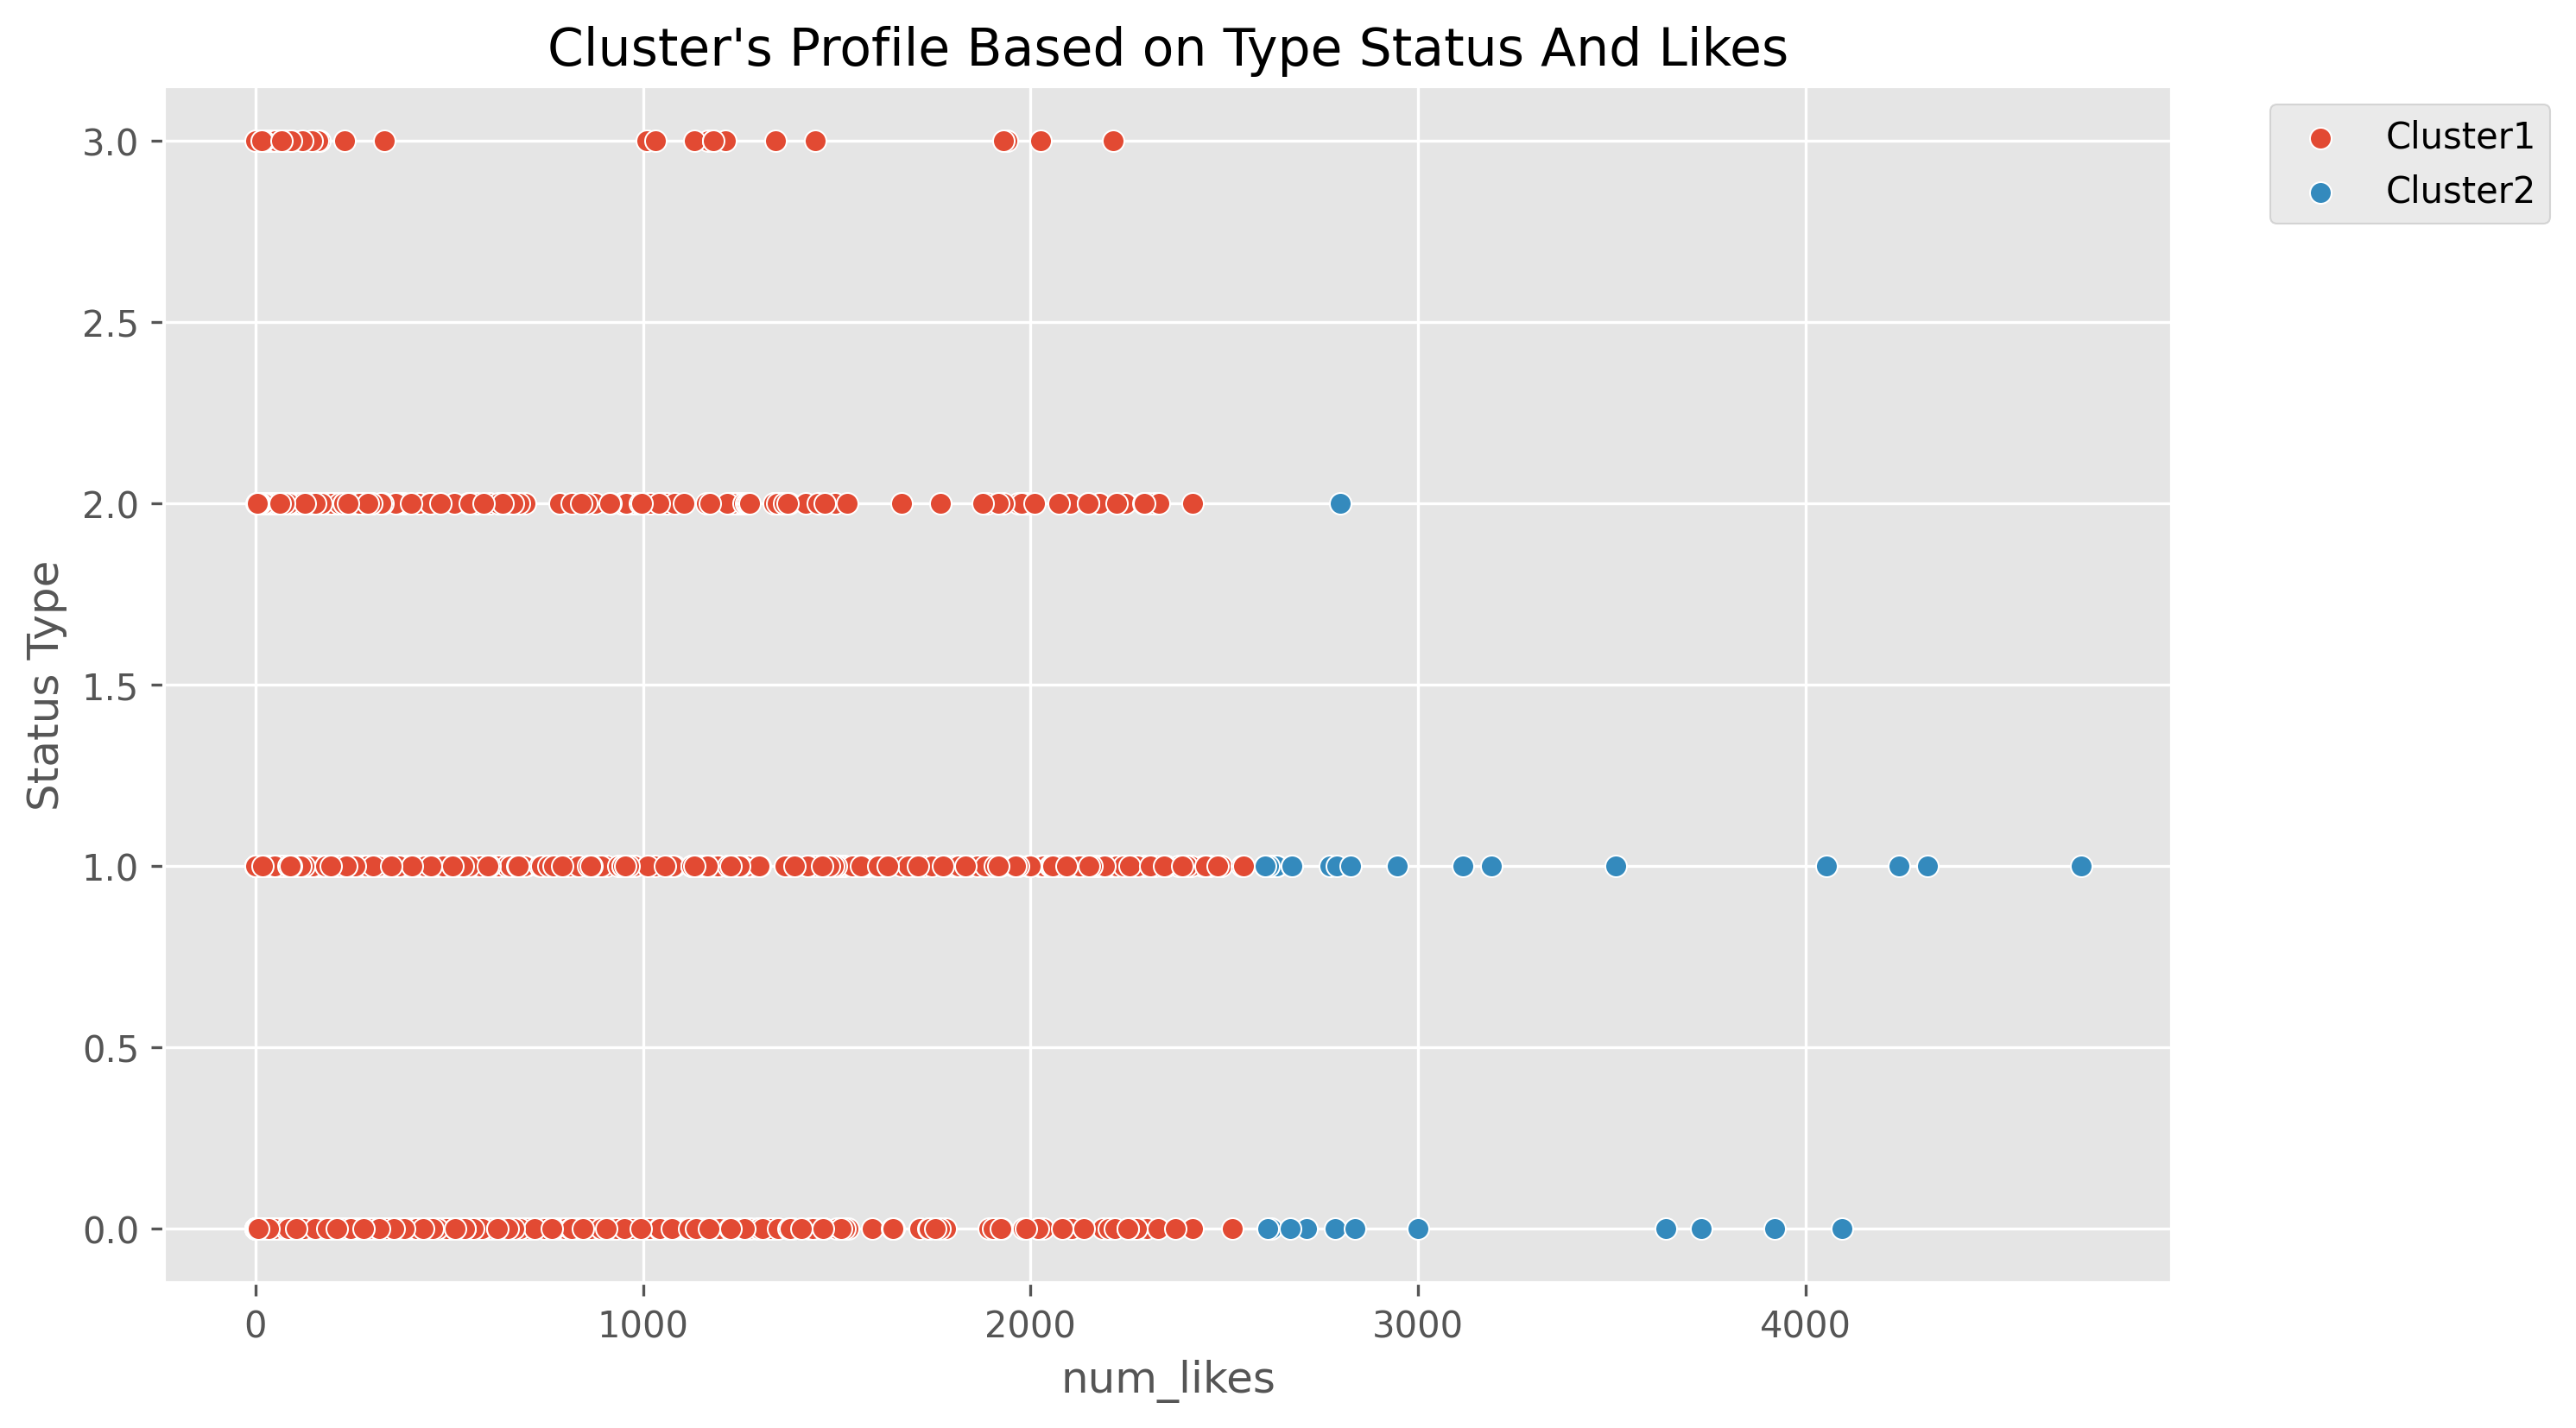

In [215]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

plt.figure(figsize = (10,6), dpi = 300)
sns.scatterplot(x = X[y_hc == 0,0], y = X[y_hc == 0,1], label = 'Cluster1')
sns.scatterplot(x = X[y_hc == 1,0], y = X[y_hc == 1,1], label = 'Cluster2')


plt.title("Cluster's Profile Based on Type Status And Likes")
plt.xlabel('num_likes')
plt.ylabel('Status Type')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

* We can see that the sellers of the cluster 1 independetly of the status type, always have less likes than the sellers of cluster 2

**========================================================================================================**

* **Cluster's Profile Based on Likes And Hour**

In [216]:
X = df[['num_likes','hour']].values
X

array([[432,   6],
       [150,  22],
       [204,   6],
       ...,
       [  1,  23],
       [349,   0],
       [ 17,  10]])

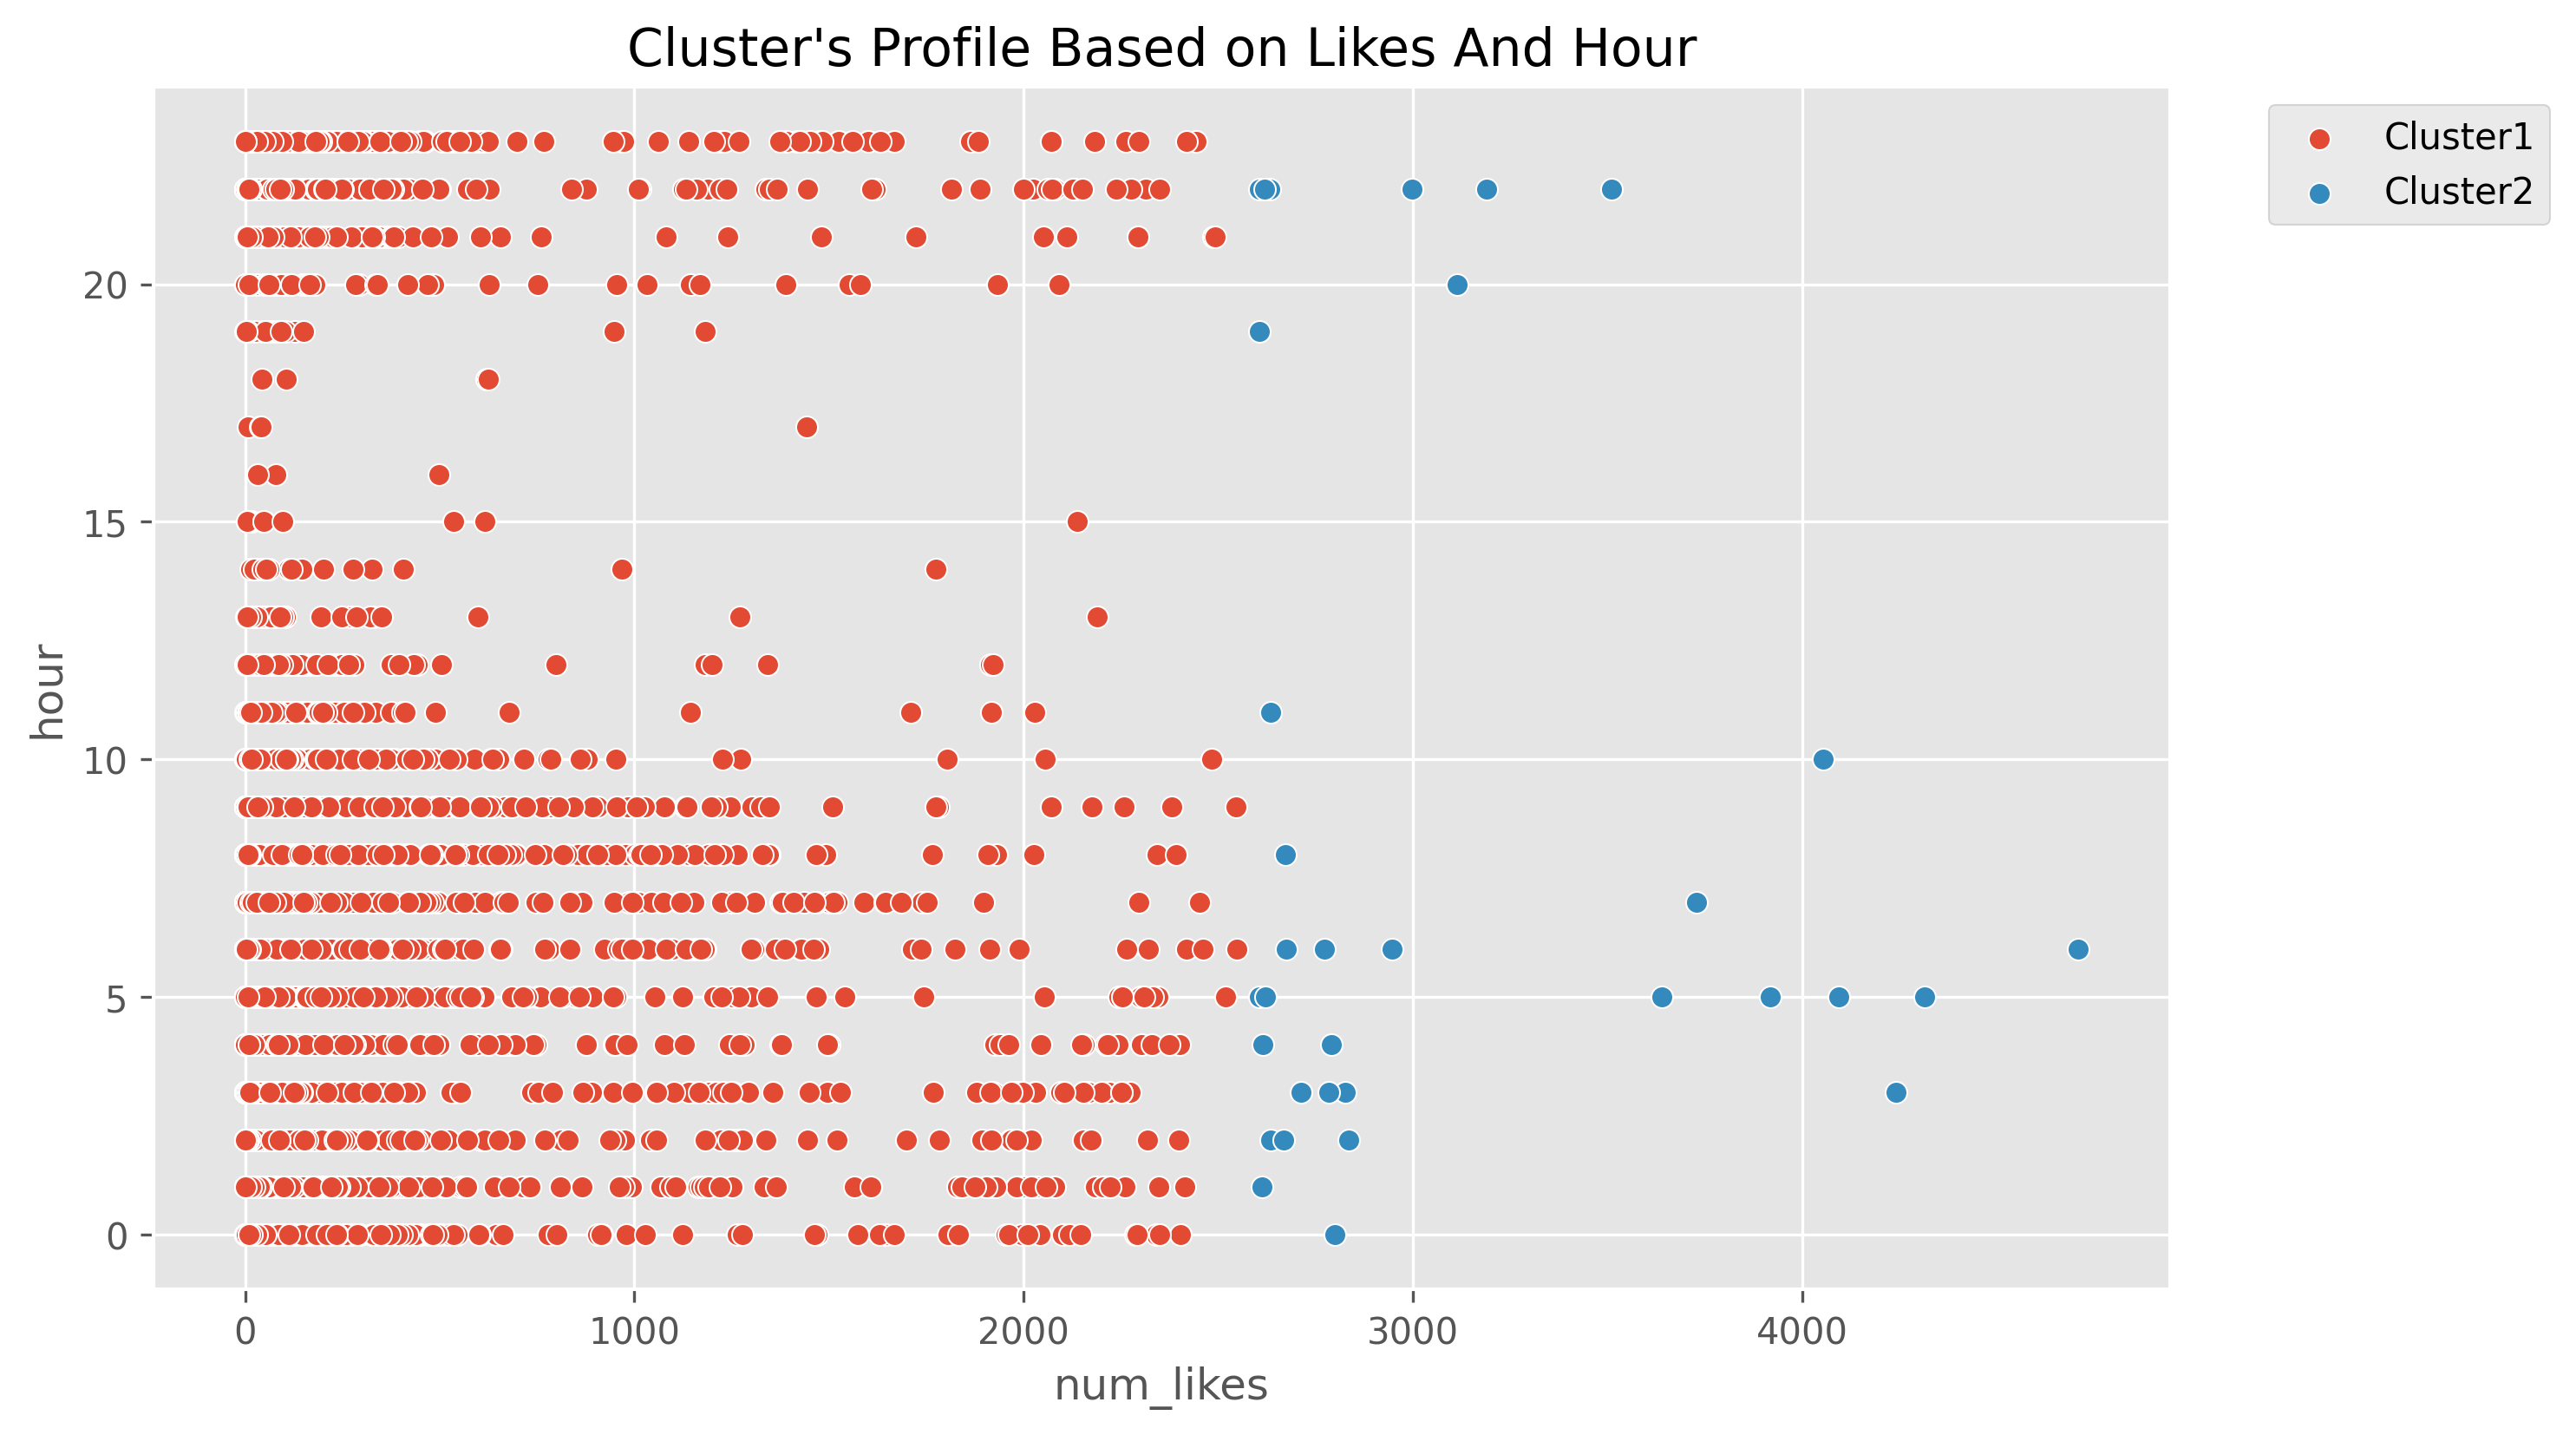

In [217]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

plt.figure(figsize = (10,6), dpi = 300)
sns.scatterplot(x = X[y_hc == 0,0], y = X[y_hc == 0,1], label = 'Cluster1')
sns.scatterplot(x = X[y_hc == 1,0], y = X[y_hc == 1,1], label = 'Cluster2')



plt.title("Cluster's Profile Based on Likes And Hour")
plt.xlabel('num_likes')
plt.ylabel('hour')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

* We can see that the sellers of the cluster 1 independetly of the hour, always have less likes

**========================================================================================================**

* **Cluster's Profile Based on Likes And Month**

In [218]:
X = df[['month','num_likes']].values
X

array([[  4, 432],
       [  4, 150],
       [  4, 204],
       ...,
       [  9,   1],
       [  9, 349],
       [  9,  17]])

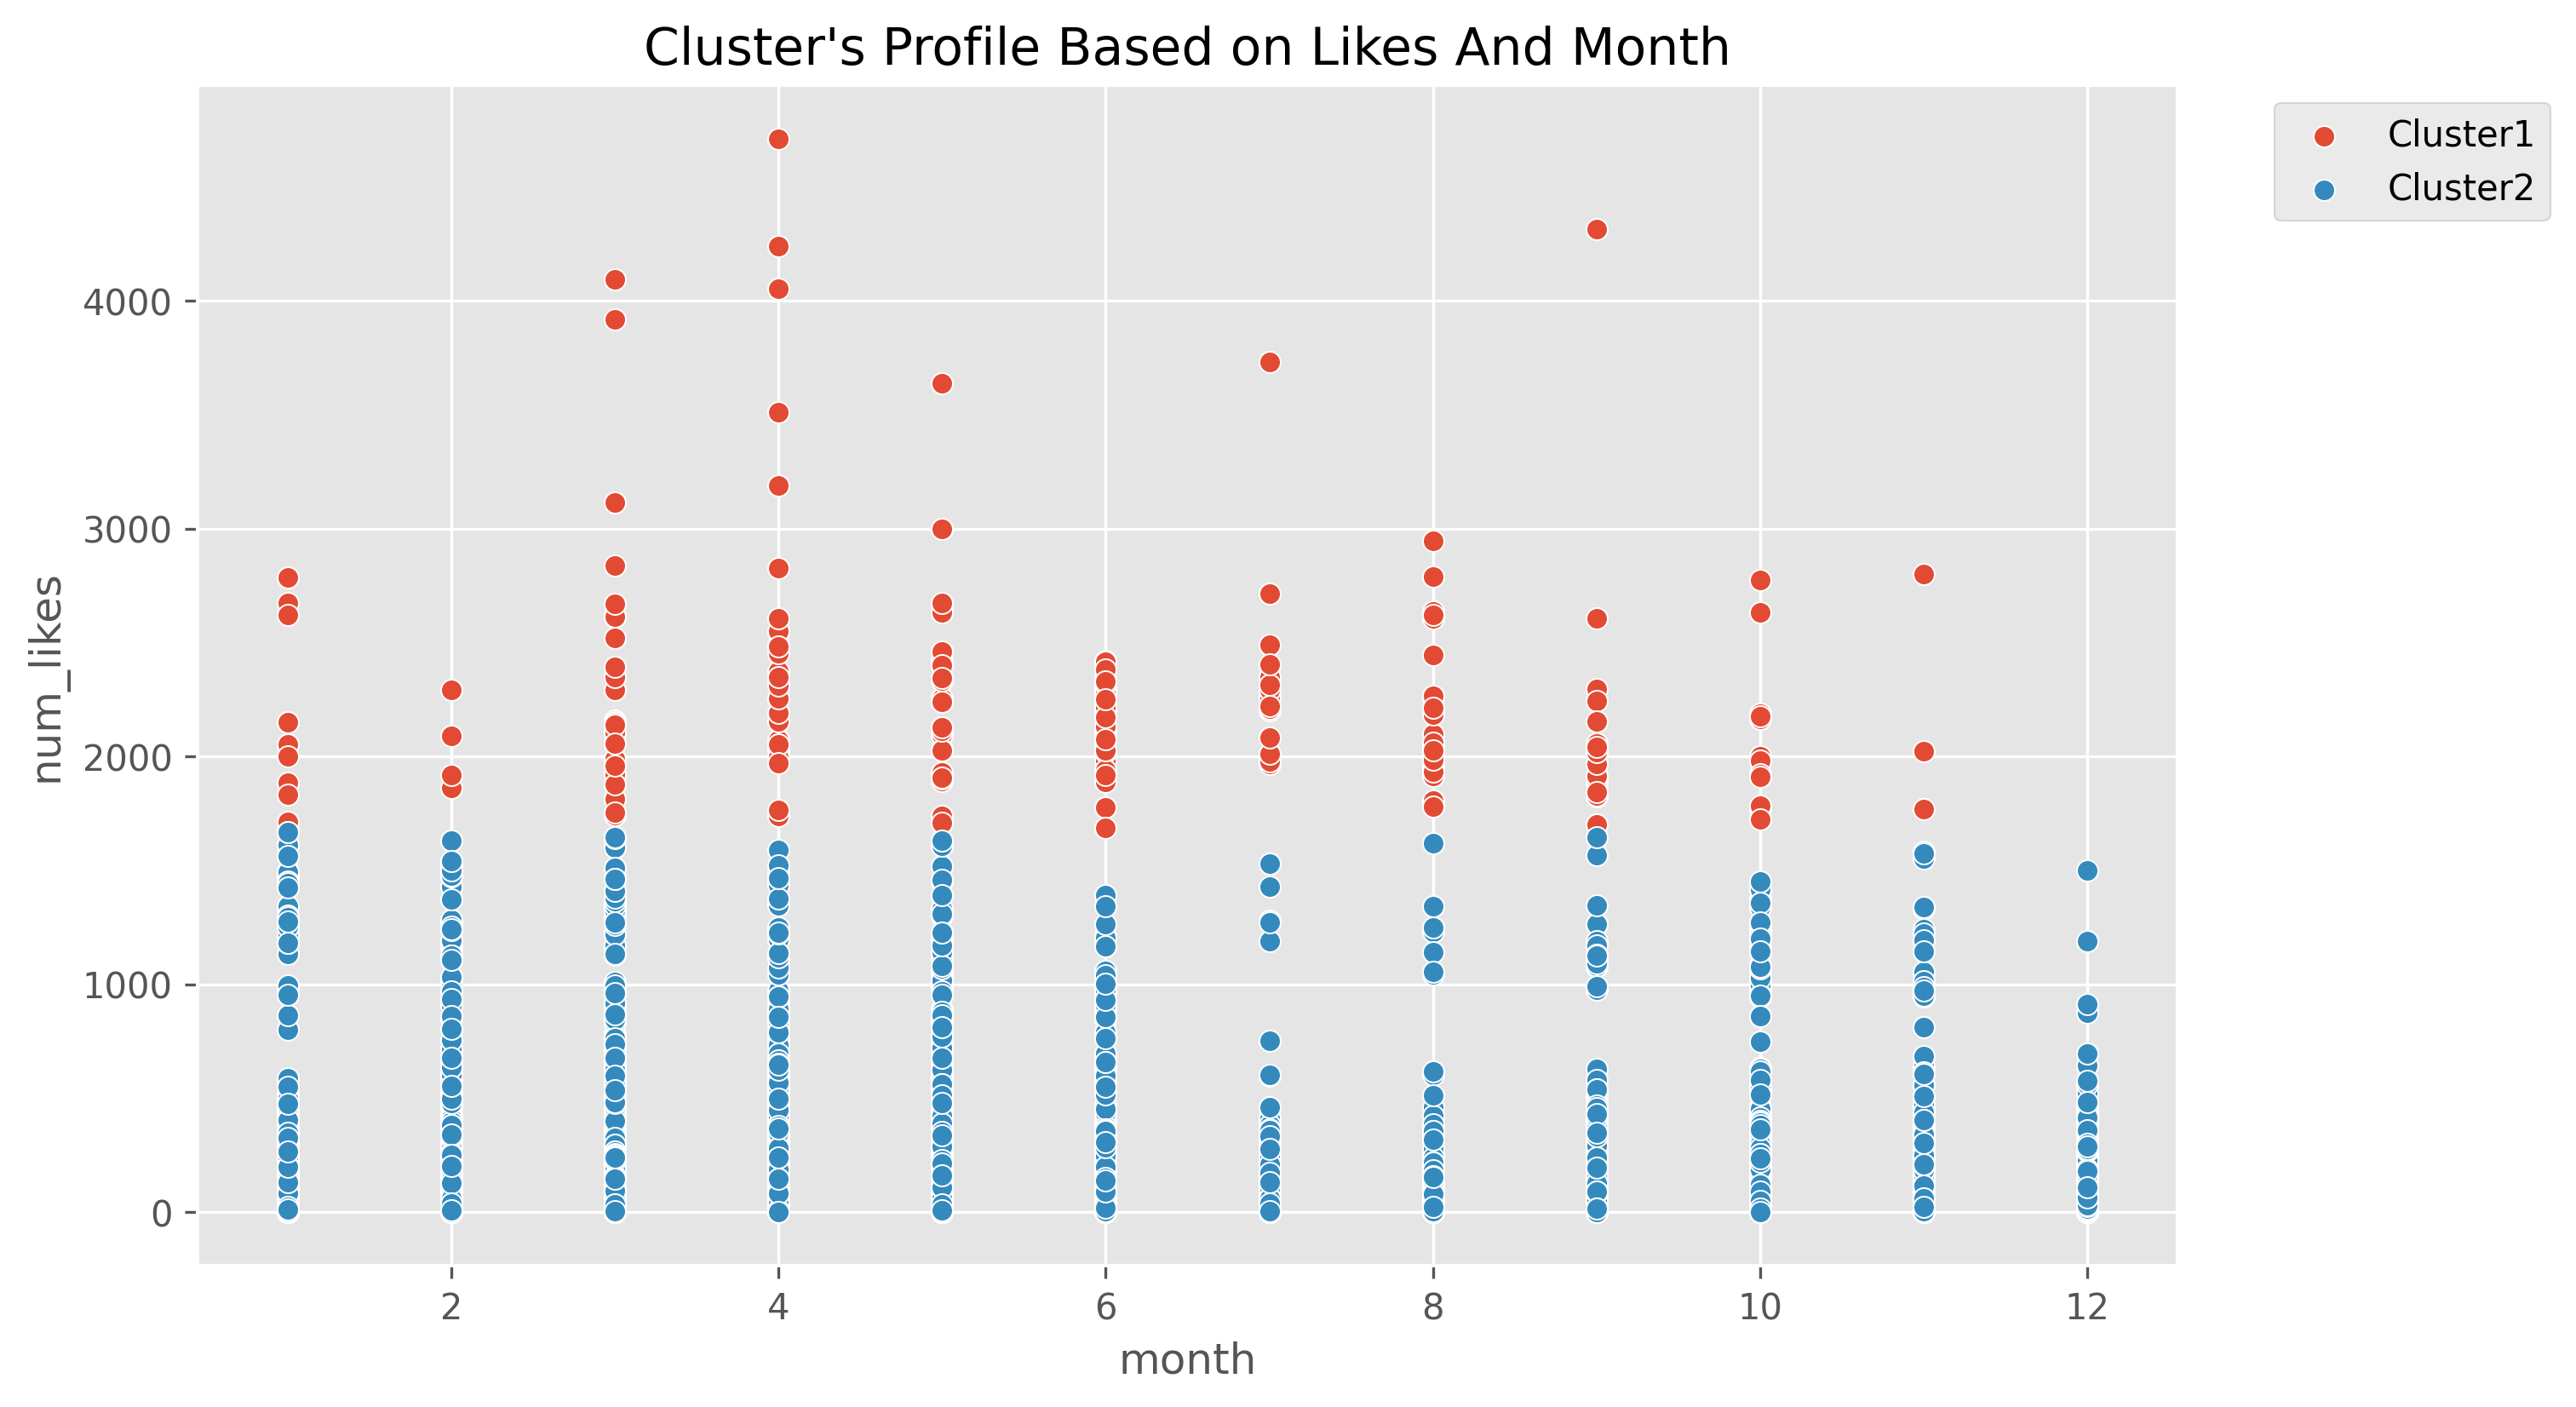

In [219]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

plt.figure(figsize = (10,6), dpi = 300)
sns.scatterplot(x = X[y_hc == 0,0], y = X[y_hc == 0,1], label = 'Cluster1')
sns.scatterplot(x = X[y_hc == 1,0], y = X[y_hc == 1,1], label = 'Cluster2')


plt.title("Cluster's Profile Based on Likes And Month")
plt.xlabel('month')
plt.ylabel('num_likes')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

* The sellers of the cluster 2 independetly of the month, always have less likes than the sellers of cluster 1

**==========================================================================================================**

<p><h2><b><font color="Black">Conclusion<b><h2><p>

* Can be concluded that the cluster 1 has seller that are in general less popular. In the other hand, the sellers of the cluster 2 have sellers that are super popular
* As we saw in the graph "Cluster's Profile Based on Shares And Likes", sellers of the cluster 2 have more shares and less likes than the sellers of the cluster 1
* In the following graph "Cluster's Profile Based on Type Status And Likes", the sellers of the cluster 1 independetly of the status type, always have less likes than the sellers of cluster 2
* In the graph "Cluster's Profile Based on Likes And Hour" the sellers of the cluster 1 independetly of the hour, always have less likes
* But we can also conclude that during 15:00 - 20:00, isn't a good time to post because there is not much likes at this time of the day
* Based on the graph "Cluster's Profile Based on Likes And Month" we could conclude that there is not a month that have a lot more likes than the other and once again the sellers of the cluster 2 independetly of the month, always have less likes than the sellers of cluster 1
